In [15]:
import pandas as pd
df = pd.read_csv('max_steps_wo_food.csv')
df.head(2)
print(len(df))

1000


In [16]:
df_grouped = df.groupby(['max_steps_without_food'])

Text(0, 0.5, 'Food Collected')

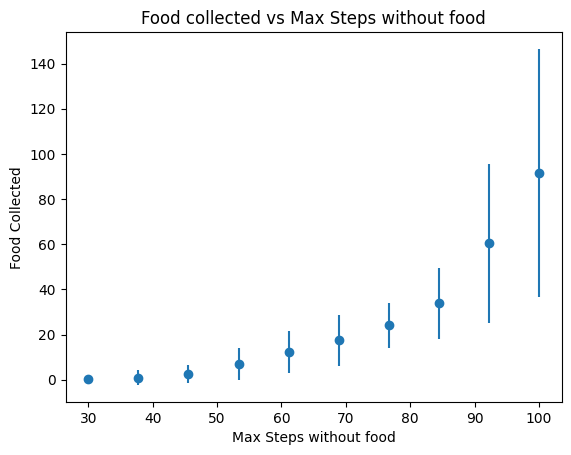

In [19]:
import matplotlib.pyplot as plt
import numpy as np


def plot_mean_std(df_grouped, column):
    mean = {} 
    std = {}

    for name, group in df_grouped:
        mean[name] = group[column].mean()
        std[name] = group[column].std()

    plt.errorbar(mean.keys(), mean.values(), yerr=std.values(), fmt='o')

    return mean, std



# food_mean, food_std = plot_mean_std(df_grouped, "Food 🍯")
food_mean, food_std = plot_mean_std(df_grouped, "Home 🏠")


# plt.plot(df["max_steps_without_food"], np.mean(df["Home 🏠"])) 
# plt.fill_between(food_mean.keys(), np.array(list(food_mean.values())) - np.array(list(food_std.values())), np.array(list(food_mean.values())) + np.array(list(food_std.values())), alpha=0.2)

plt.title("Food collected vs Max Steps without food")
plt.xlabel("Max Steps without food")
plt.ylabel("Food Collected")



Calculating best minimal value for power law fit


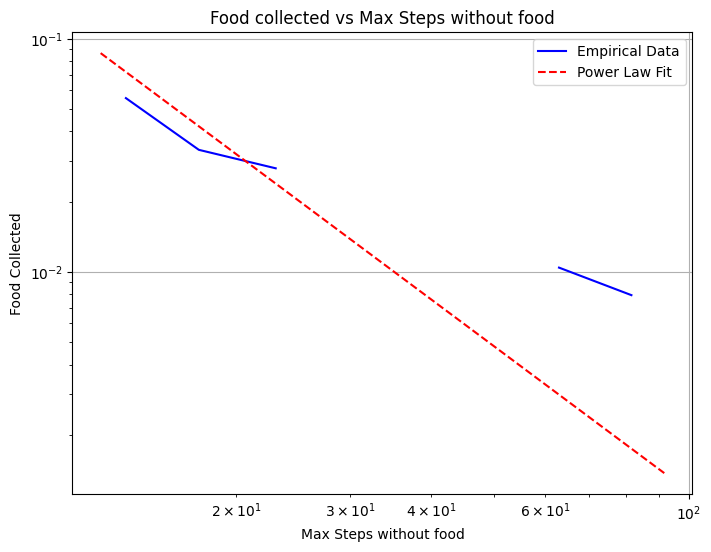

In [ ]:
import powerlaw
results = powerlaw.Fit(list(food_mean.values()))
from model import AntWorld
import matplotlib.pyplot as plt
import numpy as np

def run_experiment(steps=500, runs=5, params={}):
    """
    Runs multiple simulations of the AntWorld model and collects data on emergent properties.
    """
    results = {
        "ants": [],
        "predators": [],
        "food_collected": [],
        "entropy": []
    }
    
    for run in range(runs):
        model = AntWorld(**params)  # Initialize model with given parameters
        ants_over_time = []
        predators_over_time = []
        food_over_time = []
        entropy_over_time = []
        
        for step in range(steps):
            model.step()
            data = model.datacollector.get_model_vars_dataframe().iloc[-1]  # Get last recorded step
            
            ants_over_time.append(data['Ants 🐜'])
            predators_over_time.append(data['Predators'])
            food_over_time.append(data['Home 🏠'])  # Amount of food collected
            entropy_over_time.append(data['entropy_log'][-1] if len(data['entropy_log']) > 0 else None)

            if not model.running:
                break
        
        results["ants"].append(ants_over_time)
        results["predators"].append(predators_over_time)
        results["food_collected"].append(food_over_time)
        results["entropy"].append(entropy_over_time)

    return results

plt.figure(figsize=(8, 6))
results.plot_pdf(color='blue', linestyle='-', label='Empirical Data')
results.power_law.plot_pdf(color='red', linestyle='--', label='Power Law Fit')
plt.title("Resource collected ")
plt.xlabel("Max Steps without food")

plt.legend()
plt.grid(True)
plt.show()

In [29]:
import pandas as pd
df_init = pd.read_csv('init_ants.csv')
df_grouped_init = df_init.groupby(['init_ants'])


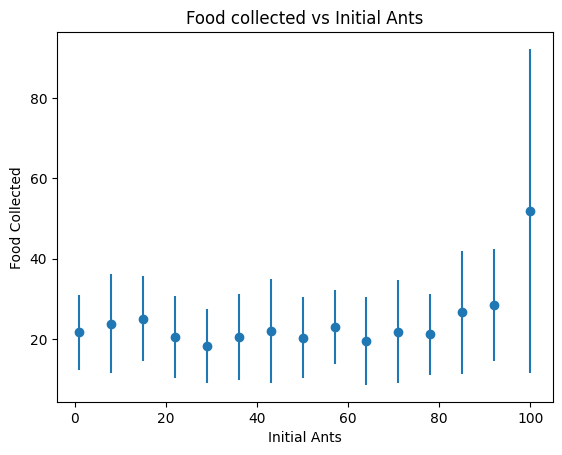

In [ ]:

init_mean, init_std = plot_mean_std(df_grouped_init, "Home 🏠")
# init_mean, init_std = plot_mean_std(df_grouped_init, "Food 🍯")

plt.title("Food collected vs Initial Ants")
plt.xlabel("Initial Ants")
plt.ylabel("Food Collected")
plt.show()

Calculating best minimal value for power law fit


Text(0, 0.5, 'Food Collected')

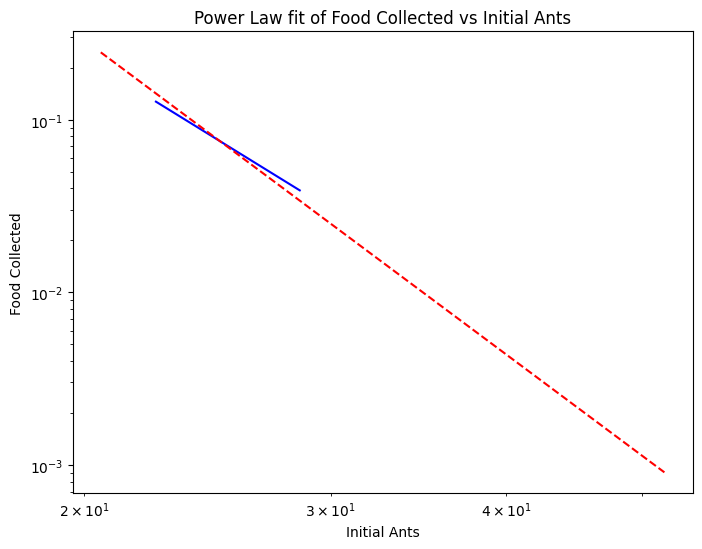

In [33]:


results = powerlaw.Fit(list(init_mean.values()))

plt.figure(figsize=(8, 6))
results.plot_pdf(color='blue', linestyle='-', label='Empirical Data')
results.power_law.plot_pdf(color='red', linestyle='--', label='Power Law Fit')
plt.title("Power Law fit of Food Collected vs Initial Ants")
plt.xlabel("Initial Ants")
plt.ylabel("Food Collected")
